# 我的毕设
## 线性模型测试结果
首先导入各种库，之后我们使用线性模型进行回测，进入市场的原则是当T天的回归结果为正，那么就购买，如果为负就全部抛售，如果斜率接近0，那么就不操作

我的任务
1. *实现线性模型的策略* **测试！**
2. *实现买入持有的回测*
3. *实现限制时间的回测*
4. 实现结果的类
5. *实现最大回撤的计算*
6. *实现tradelog绘图*



测试该类型的任务
1. 跑买入持有的结果
2. 跑T=20的结果，绘图
3. 比较5 10 20 60 200 的区别
4. 给出最好的策略，计算2016-2017的结果

In [1]:
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 6)

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from jy_strategy import Strategy,SMA,MACD,Param,Kalman,HP,Linear_Model
from matplotlib import pylab
from jy_center import Center_Param, Center

### 1. 买入持有
就是说我们在测试开始时买入，在结束时卖出，可以看这样操作可以看出一支股票的在这一段时间的走势和涨跌。这也是很多价值投资者的基本方法，选择一支股票并且一只持有它，是因为相信这支股票代表的公司会有比较好的发展。

在这次测试中，我们选择确定参数的回测时间是2010年-2015年，测试参数效果的回测时间是2016-2017年。

In [3]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C = Center(C_param)   # 实例化交易中心变量

df = pd.read_csv("600005.XSHG.csv") #导入测试数据

In [4]:

C.choose_strategy(Strategy("base",df))# 选择基本策略
C.run_buy_and_hold()   #买入持有策略

real date:2009-12-31


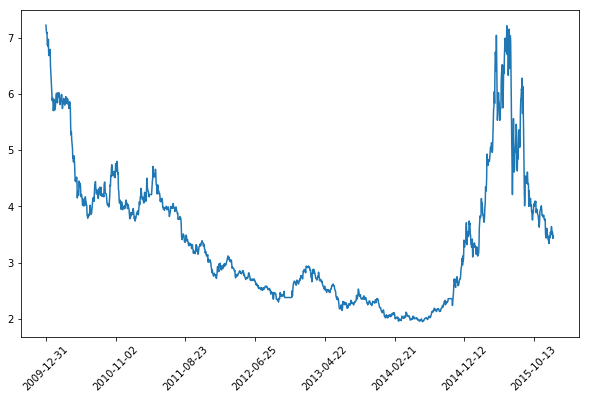

In [5]:
 C.print_his_plot()

可以看出这支股票整体在2010年到2014年上半年都是出于下跌的，而在2014年下半年到2015年下半年经历了大幅上涨和下跌。如果买入持有是从2010年开始一直到2015年底结束，那么就错过了抛售的最好时机，最后结果也是亏损的。

In [6]:
C.print_result()

money:2.10999999999
cangwei:166389.0
roi:-0.42096417
alpha:0.0674225013937
beta:0.80960501198
algorithem volatility: 3.0150846834
bench volatility: 3.22398130464
sharpe ratio: 0.288082447823
max drawdown: 0.676078310061
win ratio:0.029473684210526315


从上面的结果可以看出，整体的收益是亏损的，亏损为42%。

### 线性回归测试
T = 20

real date:2009-12-31
money:813267.2499999999
cangwei:0
roi:-0.18673275000000011
alpha:0.418959703056
beta:0.510748556139
algorithem volatility: 1.99566170313
bench volatility: 3.22398130464
sharpe ratio: 0.463198363546
max drawdown: 0.5163436592662641
win ratio:0.05543859649122807
transfer times:22
1425


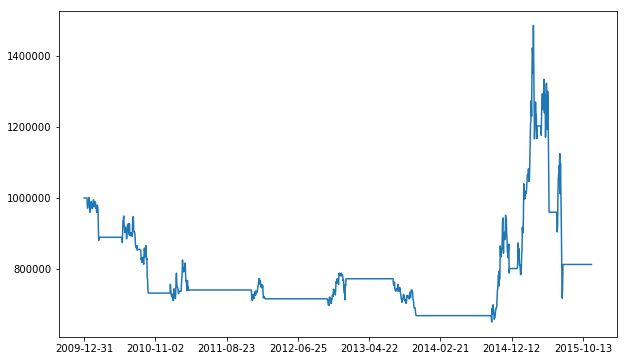

In [4]:
C.choose_strategy(Linear_Model("Linear_Model",df, [20,0.01,-0.01]))# 选择线性策略
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

   name        time  price      tick  Signal  his_ts_index     trend
0    ss  2010-03-03   5.98  167224.0     1.0          39.0  0.010602
1    ss  2010-04-21   5.32  167224.0    -1.0          73.0 -0.016835
2    ss  2010-07-26   4.16  213853.0     1.0         137.0  0.012684
3    ss  2010-09-29   4.00  213853.0    -1.0         181.0 -0.012970
4    ss  2010-10-18   4.74  180467.0     1.0         189.0  0.013541
5    ss  2010-11-17   4.06  180467.0    -1.0         211.0 -0.011286
6    ss  2011-02-17   4.18  175286.0     1.0         271.0  0.012669
7    ss  2011-05-06   4.23  175286.0    -1.0         324.0 -0.013759
8    ss  2012-01-20   2.99  247980.0     1.0         500.0  0.010714
9    ss  2012-03-22   2.89  247980.0    -1.0         539.0 -0.010376
10   ss  2012-12-05   2.67  268413.0     1.0         712.0  0.011654
11   ss  2013-03-01   2.88  268413.0    -1.0         766.0 -0.011158
12   ss  2013-09-13   2.46  314240.0     1.0         898.0  0.011789
13   ss  2013-12-25   2.13  314240

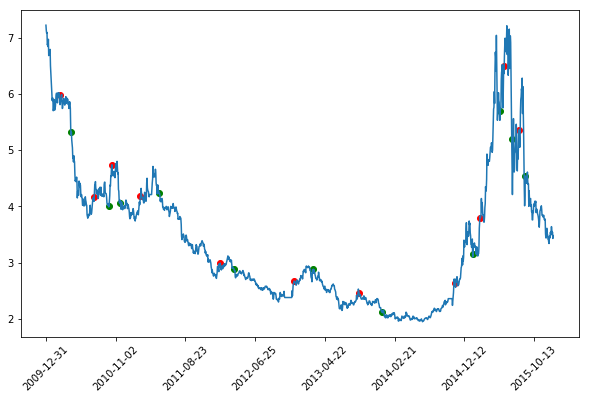

In [5]:
C.print_trade_log_pic()
print(C.trade_log)

从上图可以看出交易点，红点是买入，绿点是卖出。问题在于买卖点可能总是在趋势结束的地方，所以结果还是亏

可能是因为参数太小，反应不出结果趋势，尝试改变T的大小

T = 5
T = 10
T = 60

real date:2009-12-31
money:955993.1899999997
cangwei:0
roi:-0.04400681000000029
alpha:0.0926162848422
beta:0.868568098579
algorithem volatility: 3.08608189862
bench volatility: 3.22398130464
sharpe ratio: 0.308525695237
max drawdown: 0.5508204642449148
win ratio:0.11719298245614035
transfer times:22


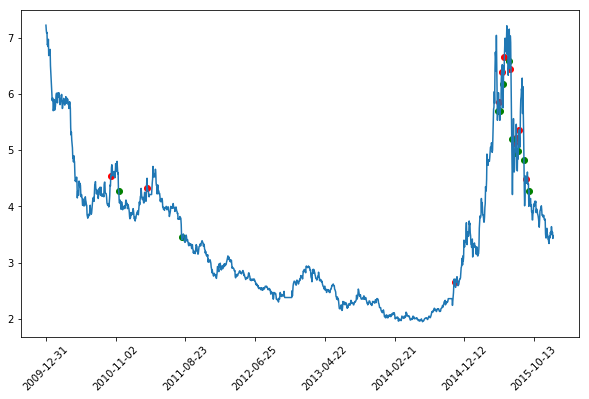

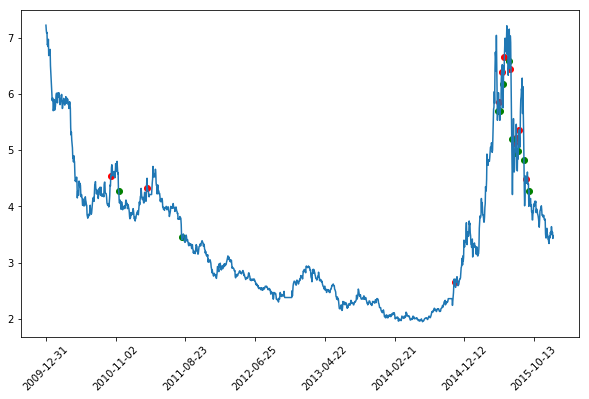

In [7]:
C.choose_strategy(Linear_Model("Linear_Model",df, [5,0.1,-0.1]))# 选择线性策略
C.run_test()
C.print_result()
C.print_trade_log_pic()

real date:2009-12-31
money:1429650.5699999998
cangwei:0
roi:0.42965056999999984
alpha:-0.270991890094
beta:1.30934765253
algorithem volatility: 4.55302744383
bench volatility: 3.22398130464
sharpe ratio: 0.225062307265
max drawdown: 0.4439704586044987
win ratio:0.15929824561403508
transfer times:4
1425
  name        time  price      tick  Signal  his_ts_index     trend
0   ss  2011-04-13   4.61  216919.0     1.0         308.0  0.010100
1   ss  2011-06-22   3.88  216919.0    -1.0         356.0 -0.010034
2   ss  2013-01-31   2.92  288236.0     1.0         750.0  0.010005
3   ss  2015-07-20   4.96  288236.0    -1.0        1346.0 -0.011808


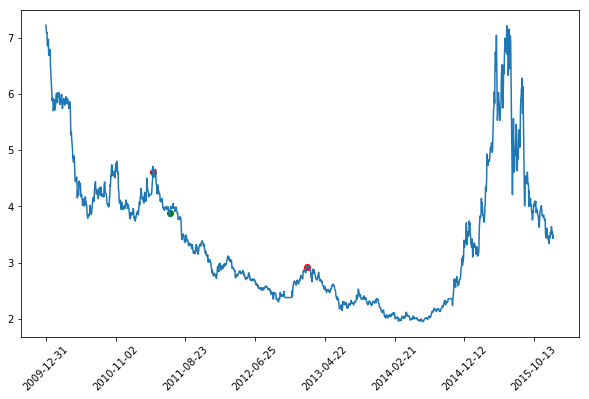

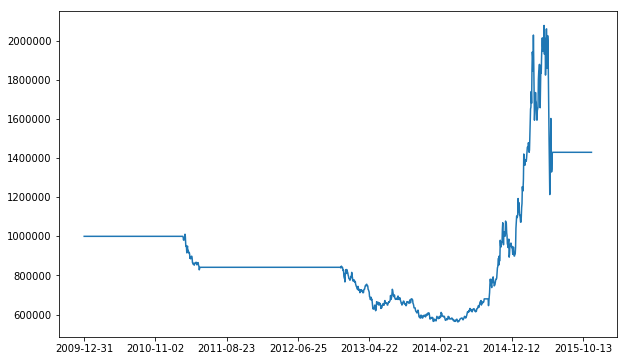

In [6]:
C.choose_strategy(Linear_Model("Linear_Model",df, [60,0.01,-0.01]))# 选择线性策略
C.run_test()
C.print_result()
C.print_trade_log_pic()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))
print(C.trade_log)

[4.3099999999999996, 4.4800000000000004, 4.9299999999999997, 4.7300000000000004, 4.8200000000000003, 4.7300000000000004, 4.8300000000000001, 4.8099999999999996, 4.8099999999999996, 4.7999999999999998, 4.8700000000000001, 4.9699999999999998, 5.0499999999999998, 5.0499999999999998, 5.0700000000000003, 5.1299999999999999, 5.0899999999999999, 4.96, 5.0, 5.2800000000000002, 5.4800000000000004, 5.7300000000000004, 5.7599999999999998, 6.04, 5.8300000000000001, 6.4199999999999999, 6.7400000000000002, 6.6600000000000001, 6.4000000000000004, 7.04]
[ 0.07405562  4.25352688]


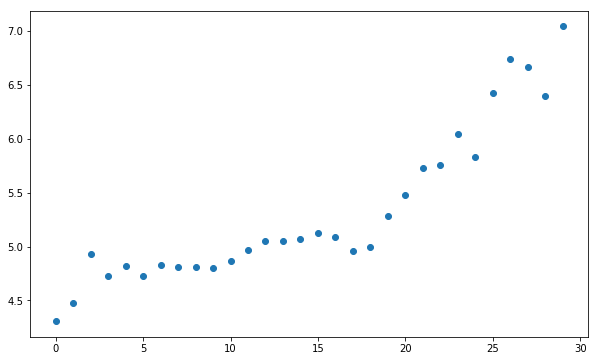

In [6]:
rr = [i for i in range(30)]
pylab.scatter(rr,C.current_strategy.his_ts[1293-30:1293])
print(C.current_strategy.his_ts[1293-30:1293])
l = np.polyfit(rr,C.current_strategy.his_ts[1293-30:1293],1)
print(l)